In [31]:
# Local setup
import os
import sys

# Add current directory to Python path so we can import plotline.py
current_dir = os.getcwd()
if current_dir not in sys.path:
    sys.path.append(current_dir)

print(f"Working directory: {current_dir}")

Working directory: /Users/arvesdj/Desktop/CSE 455/plotline


# Plotline

### Panorama Implementation

**Problem:** The goal of panorama implementation is to stitch multiple images together in order to provide more context when detecting mold growth. This will help predict how mold will grow in an entire tray. 

This presents a significant challenge, as each seedling is growing throughout the day and edge detection will be inconsistent between images. 

**Solution #1:** Coins of varying sizes were placed directly on the substrate. These are expected to migrate slightly as root growth subtly shifts the position of the anchors. Further, these are likely to become obscured as the seedlings grow vertically. 

**Solution #2:** Visual anchors were placed on the edges of the tray. 

In [32]:
# Setup
import numpy as np
from skimage.io import imread
from skimage.feature import corner_peaks
import matplotlib.pyplot as plt

# plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Detected Corners')

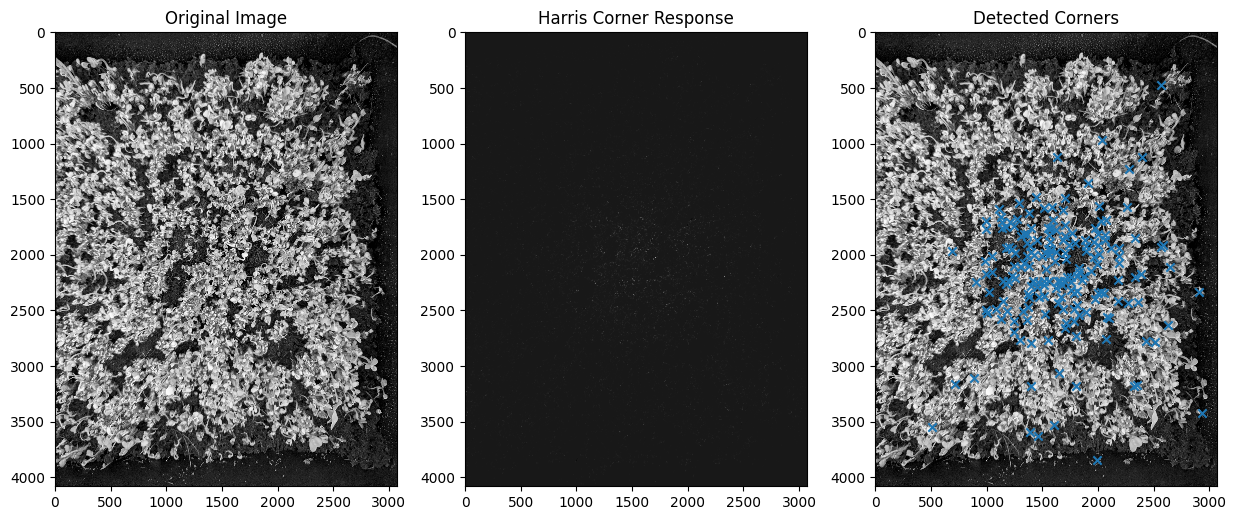

In [33]:
from plotline import harris_corners

img = imread('resources/Photos-11-15/11-15-1.jpg', as_gray=True)

# Compute Harris corner response
response = harris_corners(img, window_size=10, k=0.02)

# Detect corners
corners = corner_peaks(response, threshold_rel=0.15, min_distance=20)

# Display corner response
plt.subplot(1,3,1)
plt.imshow(img)
plt.axis('on')
plt.title('Original Image')

# # Display corner response
plt.subplot(1,3,2)
plt.imshow(response)
plt.axis('on')
plt.title('Harris Corner Response')

# # Display detected corners
plt.subplot(1,3,3)
plt.imshow(img)
plt.scatter(corners[:,1], corners[:,0], marker='x')
plt.axis('on')
plt.title('Detected Corners')

## Mold Detection

**Problem:** At early stages, it can be difficult to differentiate between mold growth and naturally occurring root hairs that indicate healthy plant growth. 

**Solution:** We identified unique visual characteristics that can be used to differentiate between mold growth and root hairs. 

Mold: 
- Darker, grey values
- Make connections between seedlings longer than 2mm
- More prominent after significant growth

Root Hairs: 
- White values
- Typically extend perpendicularly from seedling 1mm-2mm
- Less prominent after significant growth


Text(0.5, 1.0, 'Mold Growth Example #1')

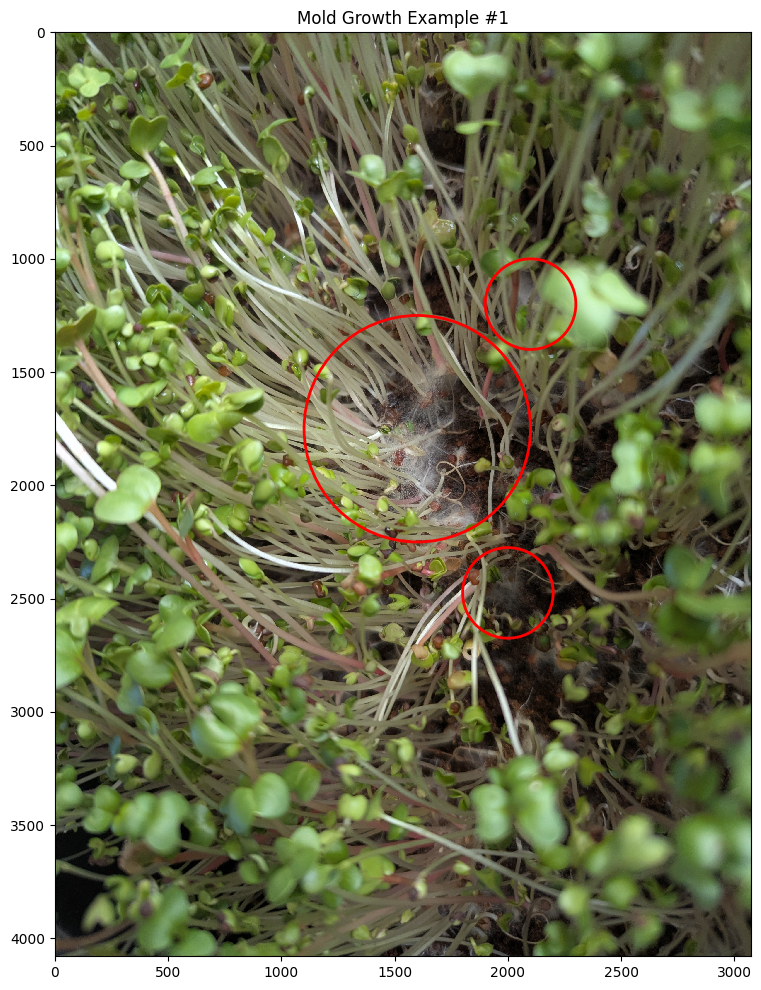

In [51]:
from matplotlib.patches import Circle

img = imread('resources/Photos-Mold/Mold-1.jpg')

plt.imshow(img)
circle = Circle((1600, 1750), 500, color='red', fill=False, linewidth=2)
circle2 = Circle((2100, 1200), 200, color='red', fill=False, linewidth=2)
circle3 = Circle((2000, 2475), 200, color='red', fill=False, linewidth=2)
plt.gca().add_patch(circle)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)
plt.axis('on')
plt.title('Mold Growth Example #1')